In [155]:
# Import packages
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from bs4 import BeautifulSoup


### Part 1:

I have created my timestamp data in a different Juypter file for privacy reasons. I uploaded both of our timestamps below:

In [95]:
t_data = pd.read_csv("Thomas_timestamp.csv")

In [96]:
s_data = pd.read_csv("timestamps.csv")

In [97]:
t_data

,ts
0,2019-04-28T18:40:13Z
1,2019-04-28T18:55:44Z
2,2019-04-28T18:55:55Z
3,2019-04-28T19:25:47Z
4,2019-04-28T19:25:53Z
...,...
1848,2023-04-07T06:06:27Z
1849,2023-04-07T06:22:12Z
1850,2023-04-07T06:40:05Z
1851,2023-04-07T09:05:26Z


Here are some additional summary statistics about our timestamps.

In [117]:
s_data['ts'] = pd.to_datetime(s_data["timestamp"])
t_data['ts'] = pd.to_datetime(t_data["ts"])

print("Thomas' data:")
print(t_data['ts'].agg(['min', 'max', 'median', 'mean']))
print("Steven's data:")
print(s_data['ts'].agg(['min', 'max', 'median', 'mean']))

Thomas' data:
min                2019-04-28 18:40:13+00:00
max                2023-04-07 18:13:08+00:00
median             2019-06-07 05:56:01+00:00
mean     2020-02-17 00:33:56.186724096+00:00
Name: ts, dtype: datetime64[ns, UTC]
Steven's data:
min         2016-12-31 17:19:02.296000+00:00
max         2022-07-15 21:22:46.799000+00:00
median   2020-05-02 08:21:43.675000064+00:00
mean     2020-03-25 06:04:43.440215808+00:00
Name: ts, dtype: datetime64[ns, UTC]


### Part 2: Analyzing timestamp data for patterns
**Each partner does this on their own.**

Import your partner's timestamp data (which should be saved as a .csv file) into a Jupyter notebook. Using Python and pandas, complete the following:

1. Make sure the timestamp is in the datetime format (for example, by using pandas.to_datetime.
2. Using pandas.diff(), make a new column that tells you the time since between a timestamp and the previous one (for example, row 2 will have the time between the timestamp in row 2 and row 1). (TIP: Make sure your timestamps are sorted in chronological order before you do this!)
3. Answer: What is the longest time between timestamps? What is the average time between timestamps?
4. Answer: What is the day with the most timestamps? How many events (timestamps) were on that day? (TIP: Once you have done .to_datetime, you now have a Timestamp object, which has all kinds of cool properties and methods -- such as returning the day or the month. Find out more here. You might also want to use DatetimeInde.. For example, you can create a new column that is the day by doing: df['days'] = pd.DatetimeIndex(df['timestamps']).day )
5. Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?
6. Analyze: Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data).  What can they tell you about the data?
7. Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?
8. W your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?
9. For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

1. Make sure the timestamp is in the datetime format (for example, by using pandas.to_datetime.

In [99]:
s_data['ts'] = pd.to_datetime(s_data["timestamp"])
t_data['ts'] = pd.to_datetime(t_data["ts"])

2. Using pandas.diff(), make a new column that tells you the time since between a timestamp and the previous one (for example, row 2 will have the time between the timestamp in row 2 and row 1). (TIP: Make sure your timestamps are sorted in chronological order before you do this!)

In [100]:
s_data = s_data.sort_values(by = "ts")

In [101]:
s_data["ts_diff"] = s_data['ts'].diff()

In [102]:
s_data

,timestamp,ts,ts_diff
389,2016-12-31T17:19:02.296Z,2016-12-31 17:19:02.296000+00:00,NaT
270986,2016-12-31T17:19:02.296Z,2016-12-31 17:19:02.296000+00:00,0 days 00:00:00
388,2016-12-31T17:21:02.693Z,2016-12-31 17:21:02.693000+00:00,0 days 00:02:00.397000
270985,2016-12-31T17:21:02.693Z,2016-12-31 17:21:02.693000+00:00,0 days 00:00:00
270984,2016-12-31T17:23:02.484Z,2016-12-31 17:23:02.484000+00:00,0 days 00:01:59.791000
...,...,...,...
270594,2022-07-15T21:16:36.103Z,2022-07-15 21:16:36.103000+00:00,0 days 00:00:00
541192,2022-07-15T21:21:45.049Z,2022-07-15 21:21:45.049000+00:00,0 days 00:05:08.946000
270595,2022-07-15T21:21:45.049Z,2022-07-15 21:21:45.049000+00:00,0 days 00:00:00
270596,2022-07-15T21:22:46.799Z,2022-07-15 21:22:46.799000+00:00,0 days 00:01:01.750000


3. Answer: What is the longest time between timestamps? What is the average time between timestamps?

The longest time between timestamps is a little over 225 days, and the average time is about 5 minutes.

In [103]:
s_data['ts_diff'].max()

Timedelta('225 days 02:32:02.145000')

In [104]:
s_data['ts_diff'].mean()

Timedelta('0 days 00:05:22.833858721')

4. Answer: What is the day with the most timestamps? How many events (timestamps) were on that day? (TIP: Once you have done .to_datetime, you now have a Timestamp object, which has all kinds of cool properties and methods -- such as returning the day or the month. Find out more here. You might also want to use DatetimeInde.. For example, you can create a new column that is the day by doing: df['days'] = pd.DatetimeIndex(df['timestamps']).day )



In [105]:
s_data["ts"].dt.date.value_counts().max()

1556

In [106]:
s_data["ts"].dt.date.value_counts().idxmax()

datetime.date(2022, 6, 7)

The most common date is June 7th, 2022 with 1556 instances. 

5. Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [107]:
s_data["ts"].dt.month.value_counts().max()

60232

In [108]:
s_data["ts"].dt.month.value_counts().idxmax()

1

January is the month with the most timestamps with 60,232 instances.

6. Analyze: Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data).  What can they tell you about the data?

I've created two visualizations. One is a barplot of the number of instances in each month. The other is a barplot of the number of instances in each year. I've included my interpretation after.

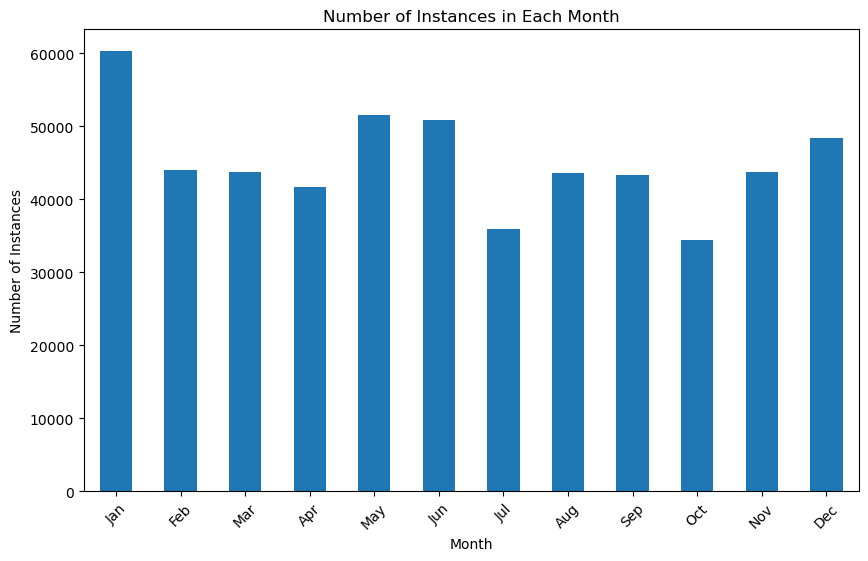

In [109]:
month_counts = s_data["ts"].dt.month.value_counts().sort_index()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


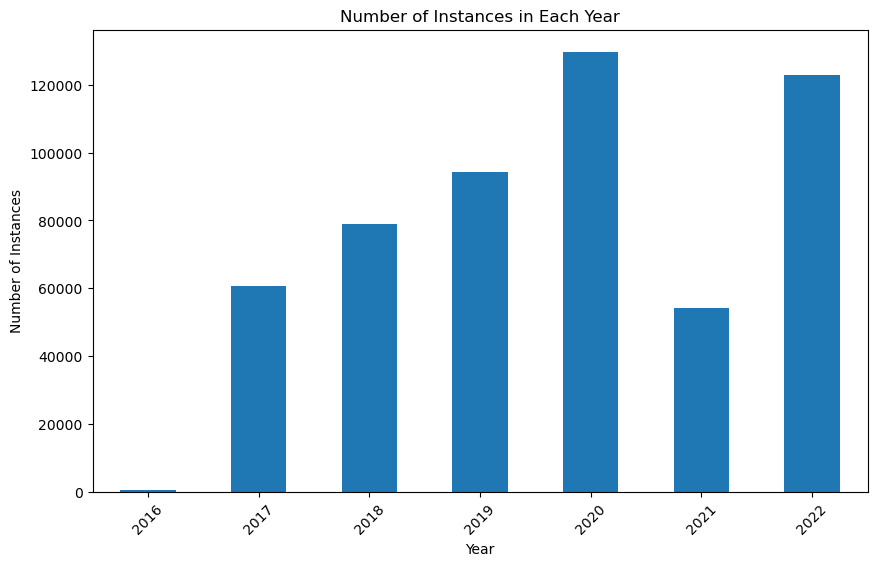

In [110]:
year_counts = s_data["ts"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Year')
plt.xticks(range(7), ['2016', '2017', '2018', '2019', '2020', '2021', '2022'], rotation=45)
plt.show()


Here, we see now distinguishable pattern per month, which tells us that Steven might use this service throughout the year (as opposed to something school related). There might be a reason why January is the most common month, but it could be a coincidence.

There is a steady increase in use per year, with a drop off in 2021. Perhaps COVID related? I have a feeling this is Google related, and perhaps Steven started using his school email in 2021 instead of his personal email.

7. Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

Because this data is used so frequently, I think it is location data from Google Maps. This might also explain the drop off in 2021, as perhaps Steven wasn't traveling frequently that year. It's hard for me to imagine this service being anything other than location data, as there are thousands of instances a day, but it could be possible.

8. Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

Steven wasn't able to guess the source correctly. My data was Spotify,  a service I only use for a few playlists and podcasts. It would have been very hard for him to infer that.

### Part 3: Make a combined visualization
**Do this part together.**

First, discuss your results together -- what did you learn about yourself and your partner through doing this?

Then, using both partners' timestamp data, create at least one visualization that shows the distribution of events over time for both people (on the same visualization). Note: To do this, you may need to do some data analysis or aggregation (for example, determining the number of data points collected each hour/day/week/month/year, etc.).

For this part, use Python and Jupyter notebook, plus matplotlib/pyplot or Seaborn.

What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?

-------------

There are three visualizations below. From the first graph, we talked about how there is a dip in the use of these services from 8AM to 3PM, which might be caused by us being in school. 

I didn't realize how clustered my data was compared to his. I listened more in the summer and for a few months at a time, rather than an everyday service like Steven's.

In [111]:
s_hour_counts = s_data["ts"].dt.hour.value_counts().sort_index() / len(s_data)
t_hour_counts = t_data["ts"].dt.hour.value_counts().sort_index() / len(t_data)


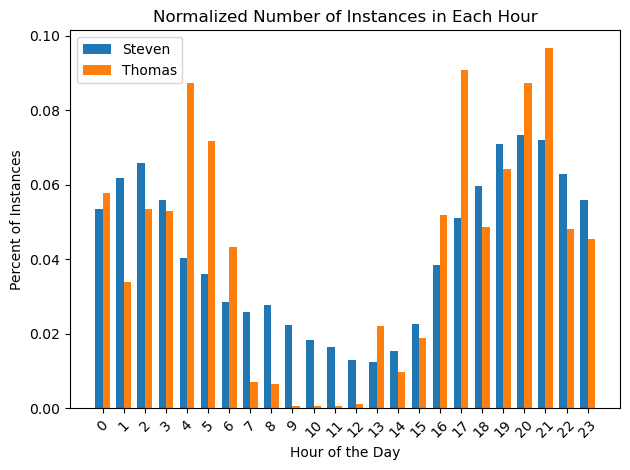

In [112]:
plot_df = pd.DataFrame({'Steven': s_hour_counts, 'Thomas': t_hour_counts})

# Create bar plot
bar_width = 0.35
index = np.arange(24)

plt.bar(index, plot_df['Steven'], bar_width, label='Steven')
plt.bar(index + bar_width, plot_df['Thomas'], bar_width, label='Thomas')

plt.xlabel('Hour of the Day')
plt.ylabel('Percent of Instances')
plt.title('Normalized Number of Instances in Each Hour')
plt.xticks(index + bar_width / 2, range(24), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [113]:
s_month_counts = s_data["ts"].dt.month.value_counts().sort_index() / len(s_data)
t_month_counts = t_data["ts"].dt.month.value_counts().sort_index() / len(t_data)


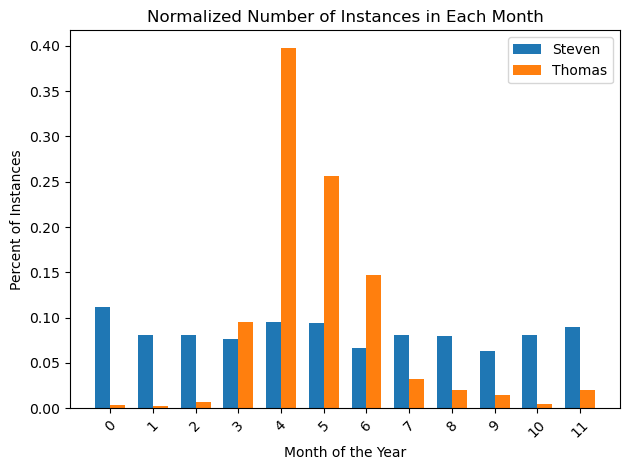

In [114]:
plot_df = pd.DataFrame({'Steven': s_month_counts, 'Thomas': t_month_counts})

# Create bar plot
bar_width = 0.35
index = np.arange(12)

plt.bar(index, plot_df['Steven'], bar_width, label='Steven')
plt.bar(index + bar_width, plot_df['Thomas'], bar_width, label='Thomas')

plt.xlabel('Month of the Year')
plt.ylabel('Percent of Instances')
plt.title('Normalized Number of Instances in Each Month')
plt.xticks(index + bar_width / 2, range(12), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

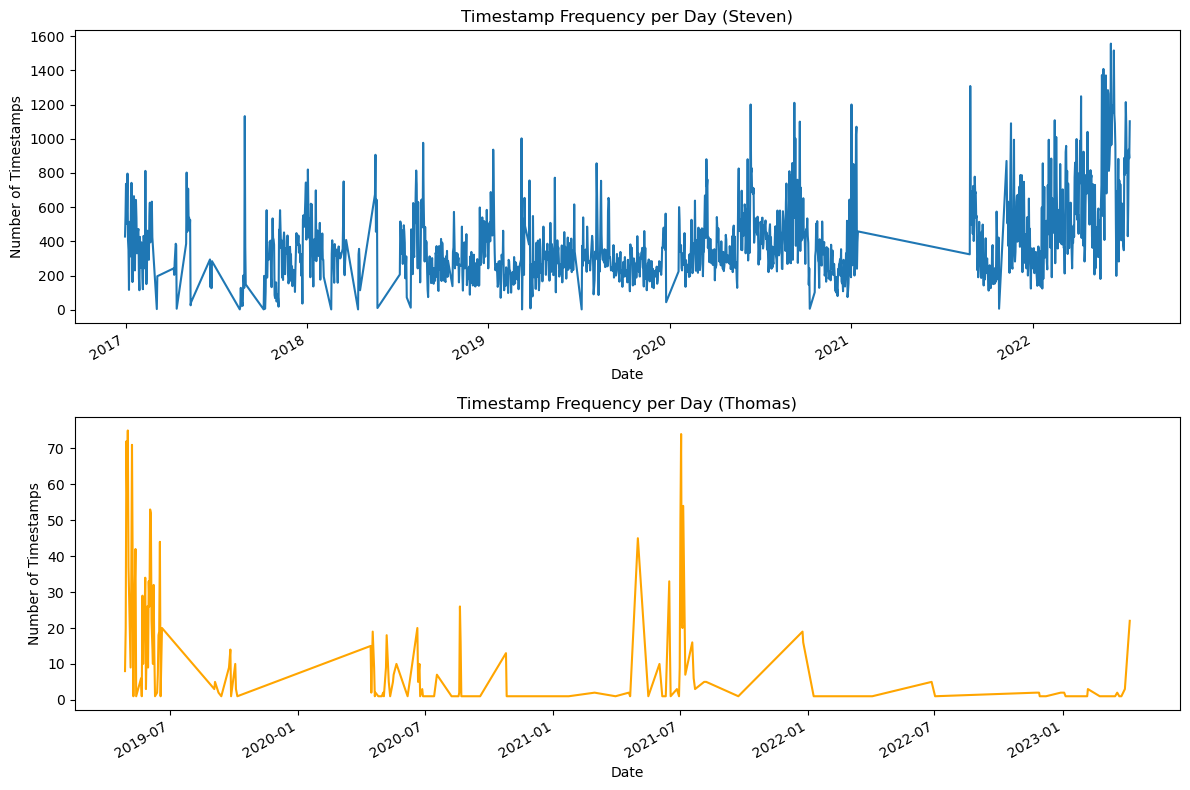

### Part 4: Analyze and visualize an additional element from  your personal data
Do this part on your own, although you are encouraged to share ideas and work with your partner on technical implementation.

Ok, we are done with the timestamp only part! Now, on your own  do some form of additional analysis of your data (any part of it, not just the timestamps). Your analysis should include:

- At least two clear questions that you ask and then (attempt to) answer via data analysis
- At least one form of data manipulation (calculating new values, doing a groupby, etc.)
- At least one visualization (you can use any tool you like: Observable, Seaborn, Flourish, etc.)

For this portion of the project, do not include your code or your raw data -- that is personal and you can keep it private! You just need to include your results (i.e. findings from your analysis) and your visualization.


-------
My first question is: Did I use the "skip" button more on songs as I used Spotify more? In theory, I'll skip less as the algorithm understands my music taste. 


First, we have to load in the data and isolate to the songs that have the "skipped" value as 0 or 1 (opposed to NA). 

In [118]:
df = pd.read_json("Streaming_History_Audio_2019-2023.json")


In [119]:
df

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2019-04-28T18:40:13Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",46439,US,66.87.191.242,unknown,Breaking Bad Main Title Theme (Extended),Dave Porter,Breaking Bad: Original Score from the Televisi...,...,None,None,None,playbtn,fwdbtn,True,NaN,False,1556476766057,False
1,2019-04-28T18:55:44Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",196533,US,66.87.191.242,unknown,Flicker,The Piano Guys,Flicker,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1556476812850,False
2,2019-04-28T18:55:55Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",196533,US,66.87.191.242,unknown,Flicker,The Piano Guys,Flicker,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1556476812850,False
3,2019-04-28T19:25:47Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",352783,US,66.87.191.242,unknown,Yellow Rose,Brendan Flynn,Yellow Rose,...,None,None,None,trackdone,trackdone,True,NaN,False,1556477738565,False
4,2019-04-28T19:25:53Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",352783,US,66.87.191.242,unknown,Yellow Rose,Brendan Flynn,Yellow Rose,...,None,None,None,trackdone,trackdone,True,NaN,False,1556477738565,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,2023-04-07T06:06:27Z,44uctu412xat16rkjkm5kmolg,ios,179260,US,172.58.231.53,unknown,None,None,None,...,S9E17 - Once a Day by Mac Miller,Dissect,spotify:episode:0Rki5L4hoEJJE5xldtZRJO,trackdone,trackdone,False,0.0,False,1680847407,False
1849,2023-04-07T06:22:12Z,44uctu412xat16rkjkm5kmolg,ios,887550,US,172.58.231.53,unknown,None,None,None,...,S9E17 - Once a Day by Mac Miller,Dissect,spotify:episode:0Rki5L4hoEJJE5xldtZRJO,trackdone,trackdone,False,0.0,False,1680847643,False
1850,2023-04-07T06:40:05Z,44uctu412xat16rkjkm5kmolg,ios,985278,US,172.58.231.53,unknown,None,None,None,...,S9E17 - Once a Day by Mac Miller,Dissect,spotify:episode:0Rki5L4hoEJJE5xldtZRJO,trackerror,endplay,False,1.0,False,1680848591,False
1851,2023-04-07T09:05:26Z,44uctu412xat16rkjkm5kmolg,ios,8710801,US,172.58.231.75,unknown,None,None,None,...,"BONUS - Mac Miller Song Draft, Q&A, and More",Dissect,spotify:episode:0FSVcOt60q8i1dSpcA8mpT,trackdone,logout,False,0.0,False,1680849605,False


In [124]:
#removes podcasts, we are concerned with my music taste
music = df[df["master_metadata_track_name"].notna()]


In [125]:
music

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2019-04-28T18:40:13Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",46439,US,66.87.191.242,unknown,Breaking Bad Main Title Theme (Extended),Dave Porter,Breaking Bad: Original Score from the Televisi...,...,None,None,None,playbtn,fwdbtn,True,NaN,False,1556476766057,False
1,2019-04-28T18:55:44Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",196533,US,66.87.191.242,unknown,Flicker,The Piano Guys,Flicker,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1556476812850,False
2,2019-04-28T18:55:55Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",196533,US,66.87.191.242,unknown,Flicker,The Piano Guys,Flicker,...,None,None,None,fwdbtn,trackdone,True,NaN,False,1556476812850,False
3,2019-04-28T19:25:47Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",352783,US,66.87.191.242,unknown,Yellow Rose,Brendan Flynn,Yellow Rose,...,None,None,None,trackdone,trackdone,True,NaN,False,1556477738565,False
4,2019-04-28T19:25:53Z,44uctu412xat16rkjkm5kmolg,"iOS 12.2 (iPhone11,2)",352783,US,66.87.191.242,unknown,Yellow Rose,Brendan Flynn,Yellow Rose,...,None,None,None,trackdone,trackdone,True,NaN,False,1556477738565,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,2023-03-23T12:21:06Z,44uctu412xat16rkjkm5kmolg,ios,9322,US,172.56.160.93,unknown,I Am California,John Craigie,"No Rain, No Rose",...,None,None,None,playbtn,unexpected-exit-while-paused,True,0.0,False,1679574057,False
1827,2023-03-26T14:59:24Z,44uctu412xat16rkjkm5kmolg,ios,39872,US,172.58.230.226,unknown,Caledonia,Dougie MacLean,With Strings,...,None,None,None,playbtn,unexpected-exit-while-paused,True,0.0,False,1679842724,False
1828,2023-03-31T20:50:56Z,44uctu412xat16rkjkm5kmolg,ios,1980,US,172.58.230.226,unknown,Caledonia,Dougie MacLean,With Strings,...,None,None,None,appload,endplay,True,1.0,False,1680295848,False
1829,2023-03-31T20:57:34Z,44uctu412xat16rkjkm5kmolg,ios,237520,US,172.58.229.163,unknown,Devorzhum - Remastered,Dead Can Dance,Spiritchaser,...,None,None,None,appload,fwdbtn,True,1.0,False,1680295996,False


In [126]:
music['ts'] = pd.to_datetime(music["ts"])
skipped = music[music["skipped"].notna()]



/var/folders/3c/ym9wm9791bl1c1zqjtv5fgdw0000gn/T/ipykernel_64762/2230251740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['ts'] = pd.to_datetime(music["ts"])


In [127]:
skipped

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
1551,2021-07-03 00:13:26+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,33196,US,172.56.42.68,unknown,Dream in Color,Cordae,Just Until....,...,None,None,None,clickrow,remote,False,0.0,False,0,False
1563,2021-07-03 05:09:38+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,0,US,172.56.42.223,unknown,Killer (feat. Jack Harlow & Cordae) - Remix,Eminem,Killer (feat. Jack Harlow & Cordae),...,None,None,None,clickrow,endplay,False,0.0,False,0,False
1564,2021-07-03 05:09:42+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,3828,US,172.56.42.223,unknown,Killer (feat. Jack Harlow & Cordae) - Remix,Eminem,Killer (feat. Jack Harlow & Cordae),...,None,None,None,clickrow,endplay,False,0.0,False,0,False
1565,2021-07-03 05:09:50+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,7012,US,172.56.42.223,unknown,Killer (feat. Jack Harlow & Cordae) - Remix,Eminem,Killer (feat. Jack Harlow & Cordae),...,None,None,None,clickrow,endplay,False,0.0,False,0,False
1566,2021-07-03 05:10:11+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,18534,US,172.56.42.223,unknown,Kung Fu,Cordae,Kung Fu,...,None,None,None,clickrow,remote,False,0.0,False,0,False
1567,2021-07-03 05:11:25+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,1300,US,172.56.42.223,unknown,Killer (feat. Jack Harlow & Cordae) - Remix,Eminem,Killer (feat. Jack Harlow & Cordae),...,None,None,None,clickrow,fwdbtn,False,0.0,False,0,False
1568,2021-07-03 05:11:28+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,2396,US,172.56.42.223,unknown,RNP (feat. Anderson .Paak),Cordae,The Lost Boy,...,None,None,None,fwdbtn,endplay,False,0.0,False,0,False
1569,2021-07-03 05:14:31+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,182974,US,172.56.42.210,unknown,Dream in Color,Cordae,Just Until....,...,None,None,None,clickrow,trackdone,False,0.0,False,0,False
1570,2021-07-03 05:14:59+00:00,44uctu412xat16rkjkm5kmolg,Partner applewatch_sdk Apple;Watch6.3;a6def90d...,27748,US,172.56.42.210,unknown,Have Mercy,Cordae,The Lost Boy,...,None,None,None,trackdone,endplay,False,0.0,False,0,False
1802,2022-11-20 17:37:35+00:00,44uctu412xat16rkjkm5kmolg,ios,46920,US,172.58.227.115,unknown,Done With Bonaparte - Live At Gibson Amphithea...,Mark Knopfler,Real Live Roadrunning,...,None,None,None,playbtn,unexpected-exit-while-paused,True,0.0,False,1668965808,False


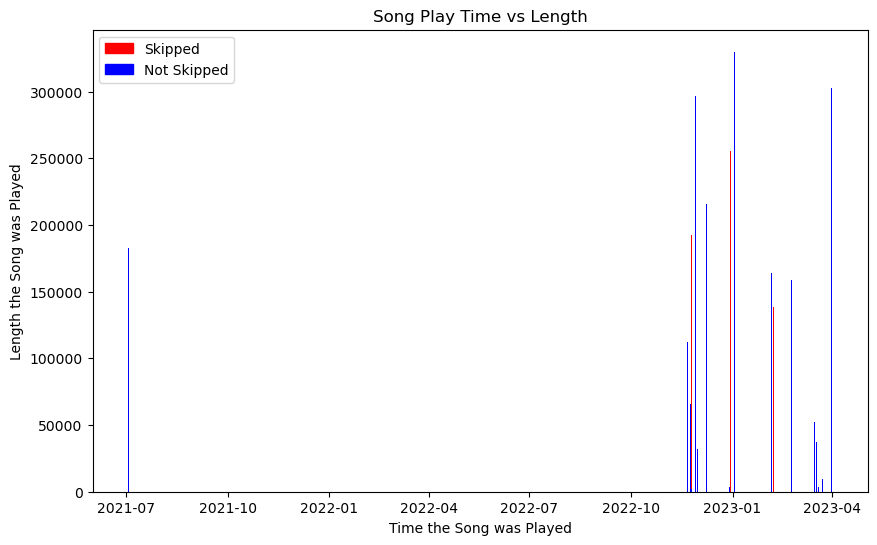

In [166]:
plt.figure(figsize=(10,6))
plt.bar(skipped['ts'], skipped['ms_played'], color=skipped['skipped'].map({0: 'b', 1: 'r'}))
plt.xlabel('Time the Song was Played')
plt.ylabel('Length the Song was Played')
plt.title('Song Play Time vs Length')
skipped_patch = mpatches.Patch(color='red', label='Skipped')
played_patch = mpatches.Patch(color='blue', label='Not Skipped')
plt.legend(handles=[skipped_patch, played_patch])
plt.show()

This is a visualization of when I skipped vs not skipped and how long I listened to a song, but that one datapoint in 2021 is causing issues for visualization purposes so I'll remove it.

In [169]:
skip2022 = skipped[skipped["ts"].dt.year > 2021].sort_values(by = "ts")

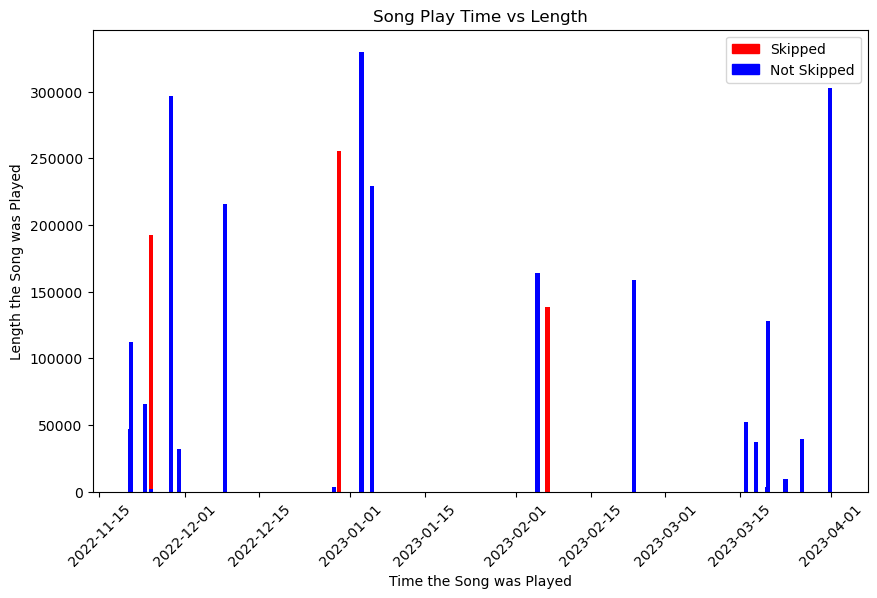

In [168]:
plt.figure(figsize=(10,6))
plt.bar(skip2022['ts'], skip2022['ms_played'], color=skip2022['skipped'].map({0: 'b', 1: 'r'}))
plt.xlabel('Time the Song was Played')
plt.ylabel('Length the Song was Played')
plt.title('Song Play Time vs Length')
plt.xticks(rotation=45)

skipped_patch = mpatches.Patch(color='red', label='Skipped')
played_patch = mpatches.Patch(color='blue', label='Not Skipped')
plt.legend(handles=[skipped_patch, played_patch])


plt.show()

As we can see, it doesn't look like I skip songs very often. It is odd that I normally skip halfway through a song, but I imagine that I do this because I'll only skip a song early if I am familiar and already know I dislike it. If a song is new to me, I have to listen to some of it before I know I don't like it.

There isn't enough data or context to know if the algorithm truly better understood my taste. 

#### Question 2:
In terms of total listening time, did I listen to podcasts or music more? I know the number of songs is greater, but I more likely to skip songs and they are much shorter. 

I'll first create new data frames of just music and just podcasts.

In [140]:
total_music = df[df["master_metadata_album_artist_name"].notna()]["ms_played"].sum()

In [141]:
total_podcast = df[df["master_metadata_album_artist_name"].isna()]["ms_played"].sum()

In [147]:
(total_music - total_podcast)/(1000*3600)

73.58768527777778

In [170]:
df["ms_played"].sum()/(1000*3600)

88.48740972222222

I listened to 73.6 hours more of music than I did podcasts. In total, I have listened for 88.5 hours, so I listen to music 84 percent of the time. 

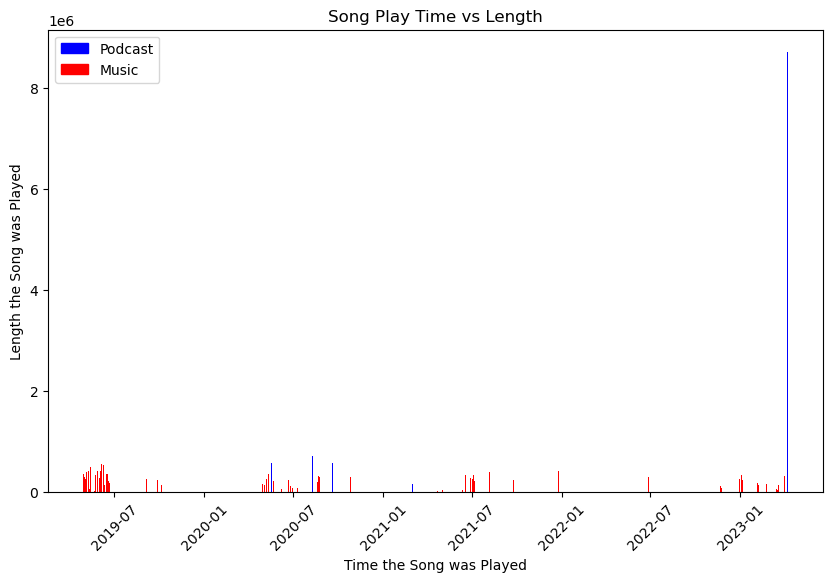

In [156]:
df['ts'] = pd.to_datetime(df["ts"])
df['ismusic'] = 1
df.loc[df["master_metadata_album_artist_name"].isna(), "ismusic"] = 0

plt.figure(figsize=(10,6))
plt.bar(df['ts'], df['ms_played'], color=df['ismusic'].map({0: 'b', 1: 'r'}))
plt.xlabel('Time the Song was Played')
plt.ylabel('Length the Song was Played')
plt.title('Song Play Time vs Length')

podcast_patch = mpatches.Patch(color='blue', label='Podcast')
music_patch = mpatches.Patch(color='red', label='Music')
plt.legend(handles=[podcast_patch, music_patch])

plt.xticks(rotation=45)
plt.show()

As we can see, the longest listening time was from a podcast, but that is a clear outlier. 

In [164]:
print("Music statistics:")
print(df[df["ismusic"] == 1]['ms_played'].agg(['min', 'max', 'median', 'mean']))
print("Podcast statistics:")
print(df[df["ismusic"] == 0]['ms_played'].agg(['min', 'max', 'median', 'mean']))


Music statistics:
min            0.000000
max       753202.000000
median    160253.000000
mean      160030.263851
Name: ms_played, dtype: float64
Podcast statistics:
min       1.000000e+02
max       8.710801e+06
median    5.805575e+05
mean      8.939835e+05
Name: ms_played, dtype: float64


As we can see, I did in fact listen to podcasts for longer per play, but I still listened to more music in total.